In [182]:
##########################################################################################
############################### Part I - Importing
##########################################################################################


import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
df = pd.read_csv('tips.csv')

In [184]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [185]:
####################################################
############### Part II - Duplicates
####################################################

In [186]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [187]:
df = df.drop_duplicates()

In [188]:
df[df.duplicated()]                         #### done with duplicates

,total_bill,tip,sex,smoker,day,time,size


In [189]:
##########################################################
############# Part III - Missing Data
##########################################################

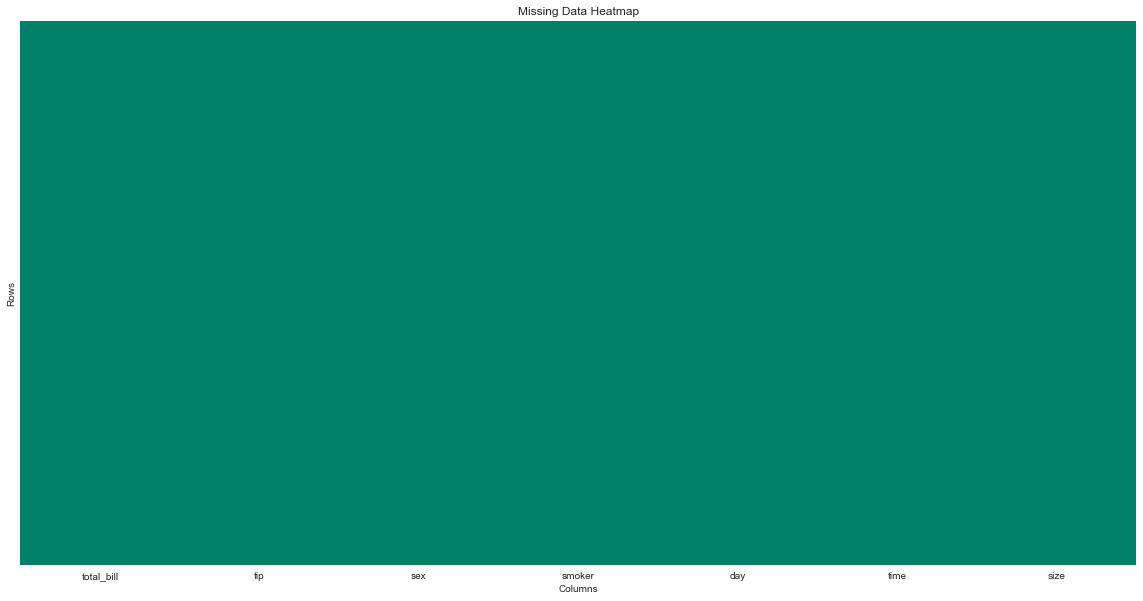

In [190]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### seems like the data is clean


In [83]:
###################################################
########## Part IV - EDA
###################################################

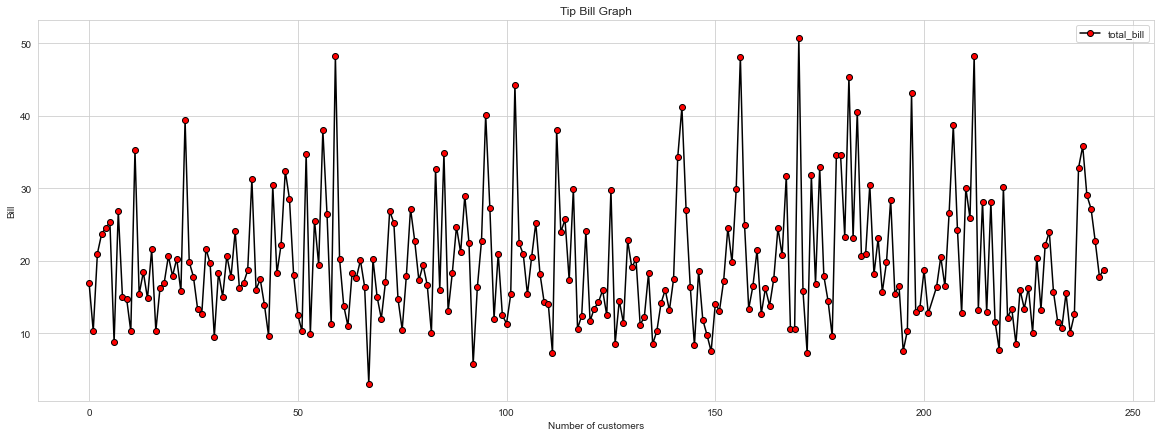

In [191]:
df.total_bill.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Tip Bill Graph')

plt.xlabel('Number of customers')

plt.ylabel('Bill')



In [192]:
df.total_bill.mean()               #### mean of the total bill

19.813868312757208

In [193]:
df.total_bill.std()                #### std of the total bill, meaning its + or - on either z score 

8.910070809697668

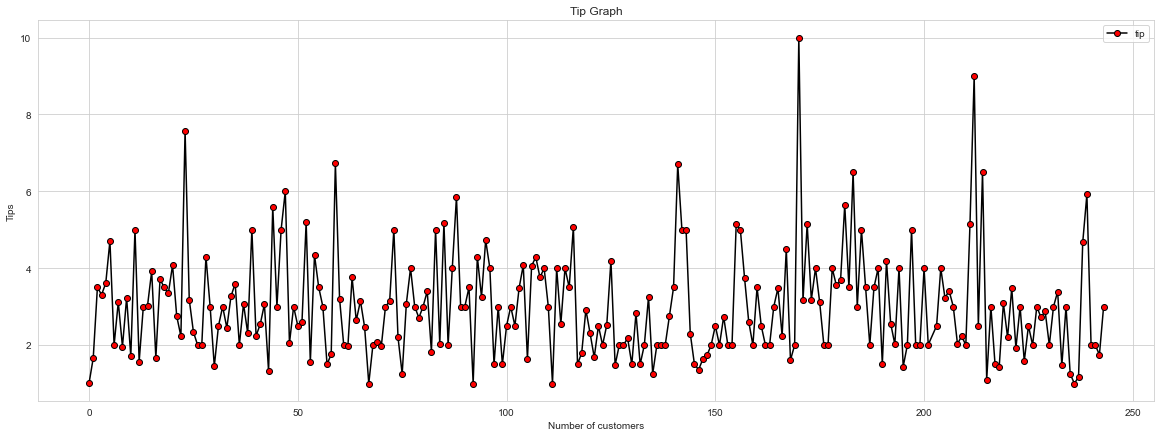

In [194]:
df.tip.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Tip Graph')

plt.xlabel('Number of customers')

plt.ylabel('Tips')



In [195]:
df.tip.mean()                       #### interesting as the mean being 3 is too low

3.0023868312757203

In [196]:
df.tip.std()                        #### then the std swings + or - 1.38 on either way

1.3850020372301455

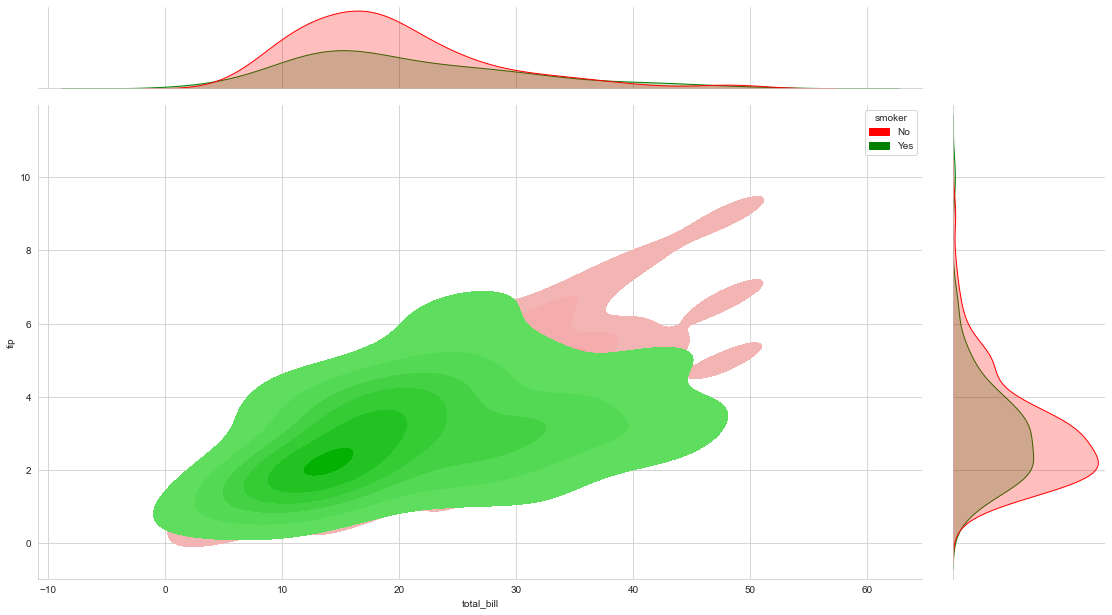

In [197]:
custom = {'No':'red',
          'Yes':'green'}

g = sns.jointplot(x=df.total_bill,y=df.tip,data=df,hue='smoker',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)

#### seems like the majority is around 2-3 tips with bills being 10-20 and interestingly more people tips if they not smokers

In [198]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


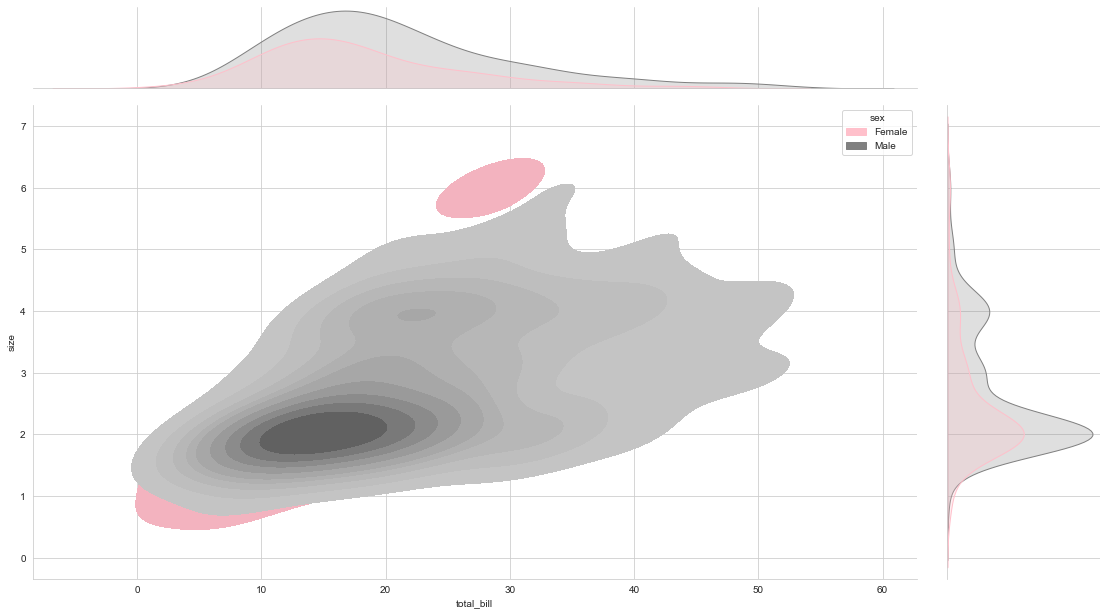

In [199]:
custom = {'Female':'pink',
          'Male':'grey'}

g = sns.jointplot(x=df.total_bill,y='size',data=df,hue='sex',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)

#### seems like the majority is male population with size 2 and total bills being 10-20

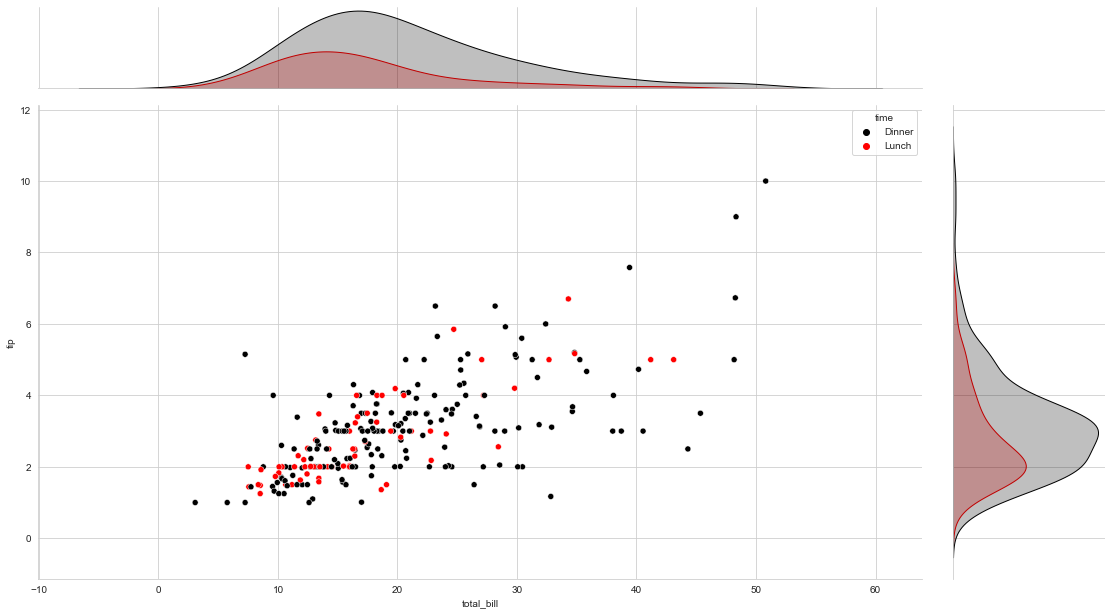

In [200]:
custom = {'Dinner':'black',
          'Lunch':'red'}

g = sns.jointplot(x=df.total_bill,y=df.tip,data=df,hue='time',palette=custom)

g.fig.set_size_inches(17,9)


#### the majority of people are 2-4 tips and total bills 10-20 doesn't matter the day of the time
#### but the most generous tippers are people who eat during dinner but their total bills are higher too

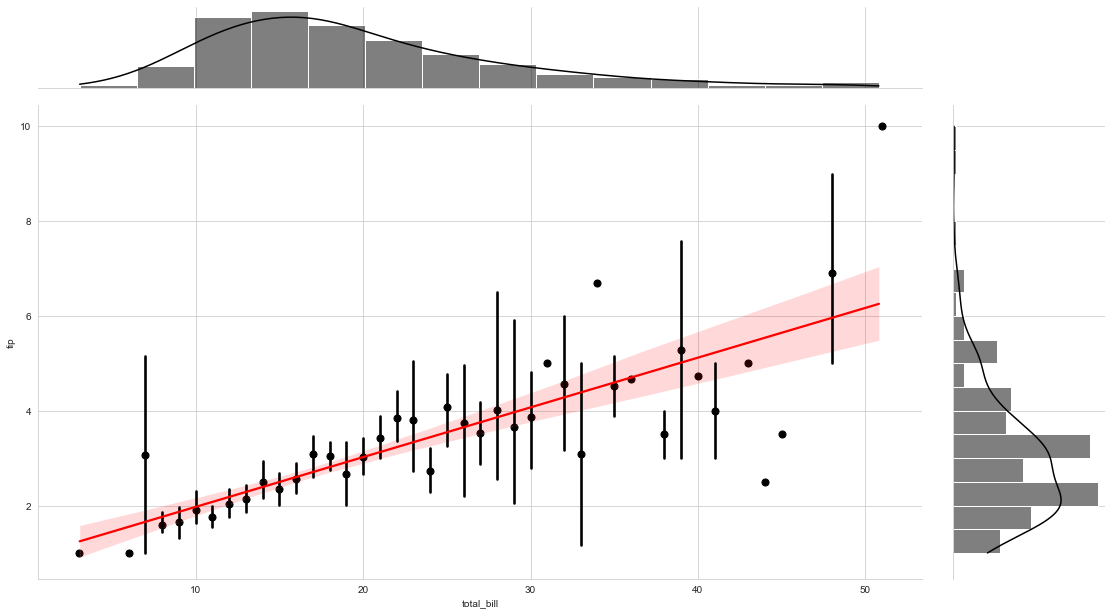

In [201]:
g = sns.jointplot(x='total_bill',y='tip',data=df,kind='reg',x_bins=[range(1,60)],color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)


#### we see a proper linear relationship between higher total bill and higher tips

In [202]:
#### lets see the pearsonr if they really are correlated

from scipy.stats import pearsonr

In [203]:
co_eff,p_value = pearsonr(df.total_bill,df.tip)

In [204]:
co_eff

0.6749978565456074

In [205]:
p_value                           #### yeah it seems like they correlated

1.1352110204088436e-33

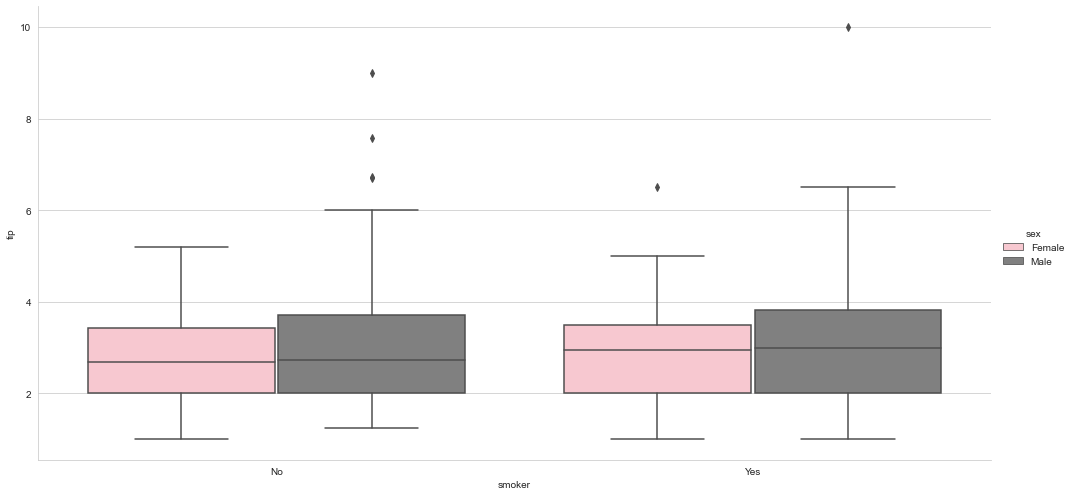

In [206]:
custom = {'Male':'grey',
          'Female':'pink'}

sns.catplot(x='smoker',y='tip',data=df,kind='box',height=7,aspect=2,palette=custom,legend=True,hue='sex')


#### honestly it doesn't really matter if they are smoker or not when compared to tips and their genders
#### just might a very small increase in tips when they are smokers regardless of genders

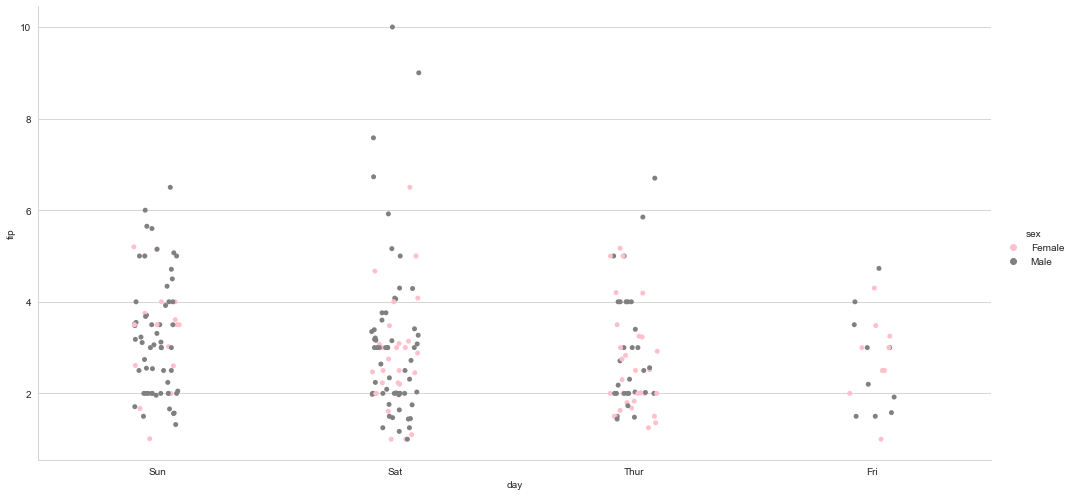

In [207]:
sns.catplot(x='day',y='tip',data=df,kind='strip',height=7,aspect=2,palette=custom,legend=True,hue='sex',jitter=True)


#### the most tippers are during the weekends excluding Friday, which does make sense

In [208]:
#### lets do some correlation

sex_map = {'Female':0,
           'Male':1}

smoker_map = {'No':0,
              'Yes':1}

day_map = {'Sun':0,
           'Sat':1,
           'Thur':2,
           'Fri':3}

time_map = {'Dinner':0,
            'Lunch':1}


In [209]:
temp_df = df.copy()

In [210]:
temp_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [211]:
temp_df.sex = temp_df.sex.map(sex_map)

In [212]:
temp_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [213]:
temp_df.smoker = temp_df.smoker.map(smoker_map)
temp_df.day = temp_df.day.map(day_map)
temp_df.time = temp_df.time.map(time_map)

In [214]:
temp_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


In [215]:
corr = temp_df.corr()

In [216]:
corr

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.674998,0.141350,0.090136,-0.172810,-0.179232,0.597589
tip,0.674998,1.000000,0.085274,0.009763,-0.136477,-0.117596,0.488400
sex,0.141350,0.085274,1.000000,0.009930,-0.211214,-0.198129,0.083248
smoker,0.090136,0.009763,0.009930,1.000000,0.166620,-0.063911,-0.130564
day,-0.172810,-0.136477,-0.211214,0.166620,1.000000,0.668917,-0.209920
time,-0.179232,-0.117596,-0.198129,-0.063911,0.668917,1.000000,-0.100045
size,0.597589,0.488400,0.083248,-0.130564,-0.209920,-0.100045,1.000000


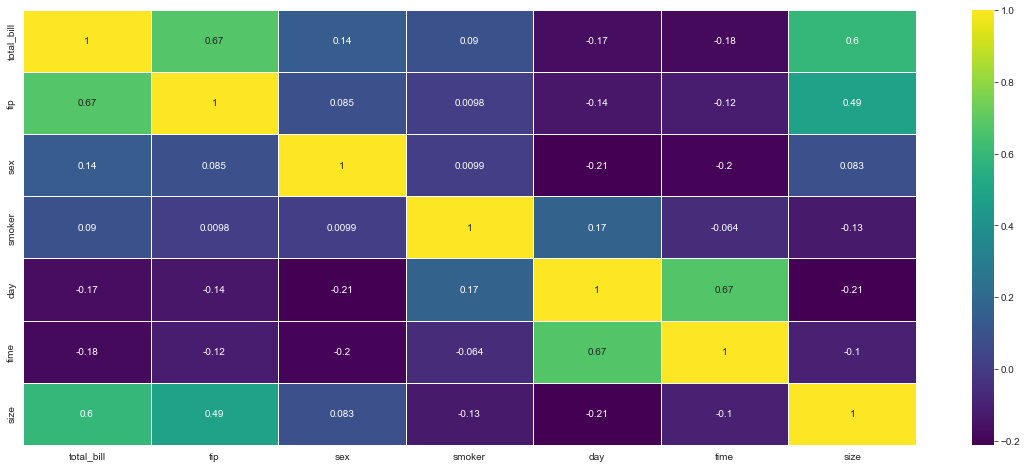

In [217]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### our target column is more correlated to size and total bills which doesn't surprise us at all

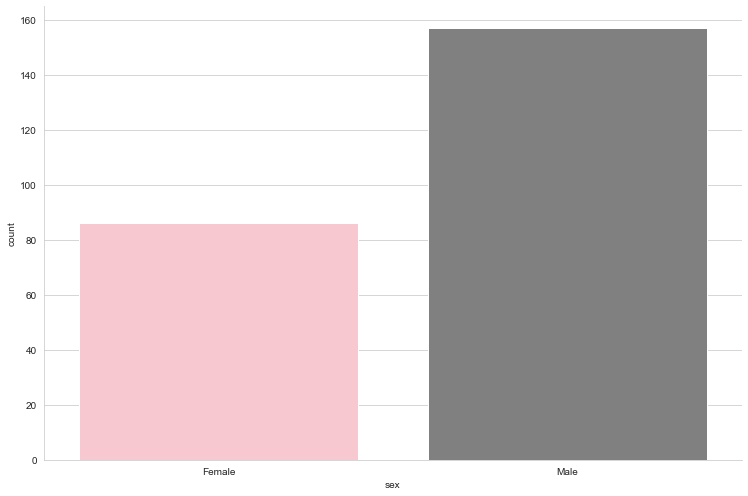

In [218]:
custom = {'Male':'grey',
          'Female':'pink'}

sns.catplot(x='sex',data=df,kind='count',height=7,aspect=1.5,palette=custom)


#### the population of male to female is not comparable so therefore we can't say anythin about the genders as it would be biased

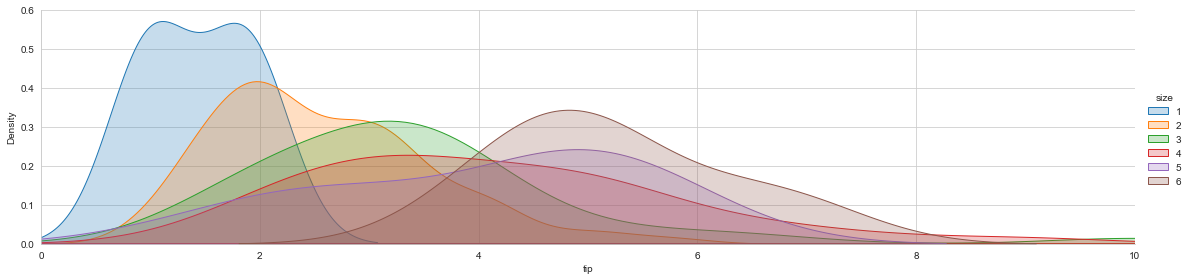

In [219]:
pl = sns.FacetGrid(df,hue='size',aspect=4,height=4)

pl.map(sns.kdeplot,'tip',fill=True)

pl.set(xlim=(0,df.tip.max()))

pl.add_legend()


#### pretty clear that the tips increase as the size increases

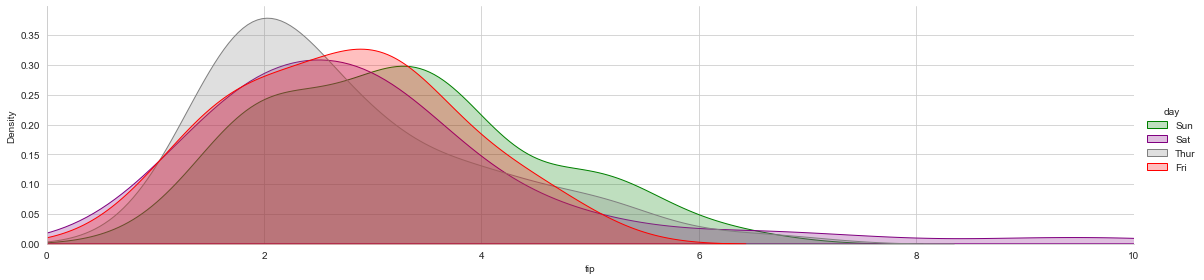

In [220]:
custom = {'Sun':'green',
          'Sat':'purple',
          'Thur':'grey',
          'Fri':'red'}

pl = sns.FacetGrid(df,hue='day',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'tip',fill=True)

pl.set(xlim=(0,df.tip.max()))

pl.add_legend()


#### weekends wins the title here for tipping contest

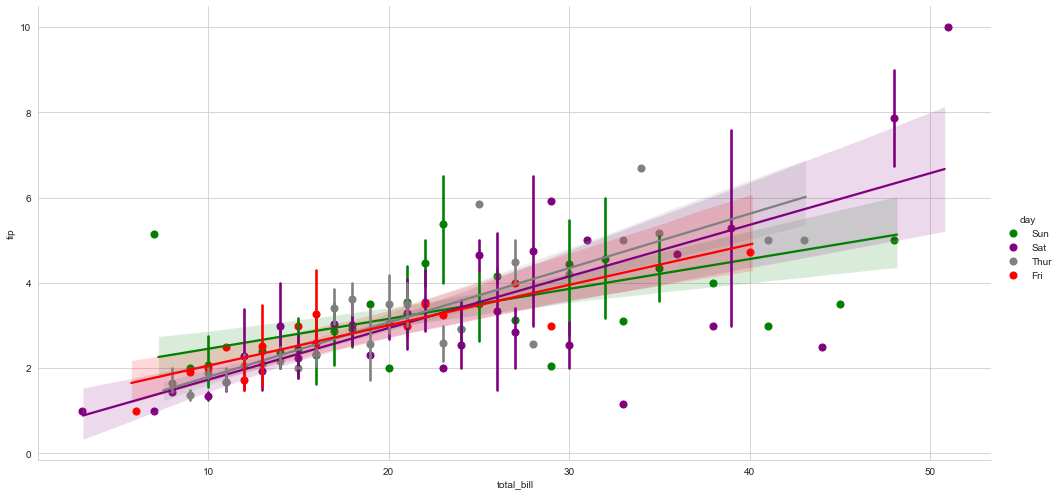

In [221]:
custom = {'Sun':'green',
          'Sat':'purple',
          'Thur':'grey',
          'Fri':'red'}

sns.lmplot(x='total_bill',y='tip',data=df,hue='day',x_bins=[range(1,60)],height=7,aspect=2,palette=custom)


#### seems like a good correlation here with tips and total bills with regards to the days

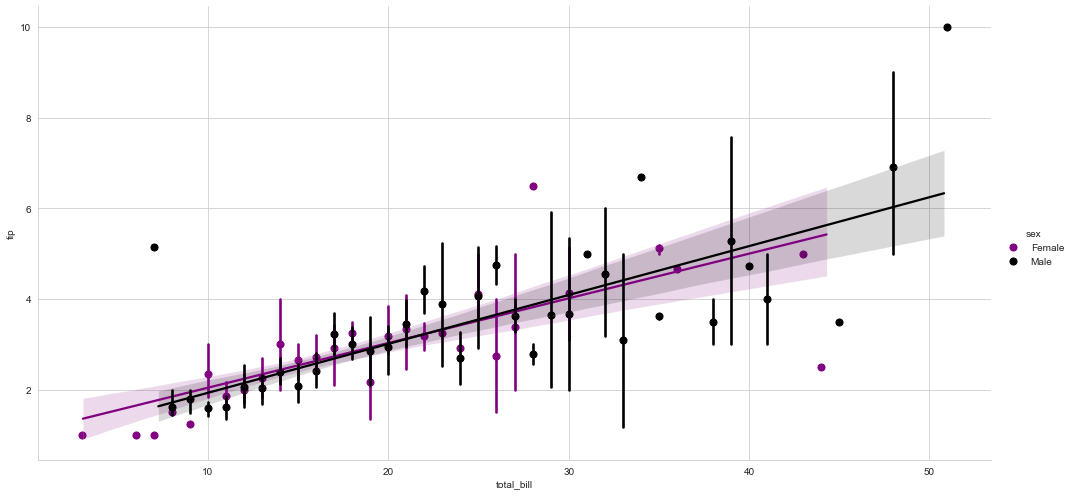

In [222]:
custom = {'Female':'purple',
          'Male':'black'}

sns.lmplot(x='total_bill',y='tip',data=df,hue='sex',x_bins=[range(1,60)],height=7,aspect=2,palette=custom)


#### seems like a good correlation and linear model

In [ ]:
#### Enough with EDA, now we will do the model part and predict the tips
#### this dataset is not ideal honestly because the data is very small for linear model but we love challenge so lets do it

In [131]:
##############################################################
################ Part V - Model - Linear Regression
##############################################################

In [223]:
X = df.drop(columns='tip')

In [224]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [225]:
y = df['tip']

In [226]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [227]:
from sklearn.linear_model import LinearRegression

In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [229]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['sex', 'smoker','day','time']),
                                               ('num', StandardScaler(),['total_bill','size'])
                                              ]
                                )


In [230]:
from sklearn.pipeline import Pipeline

In [231]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())
                       ])

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [234]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('num', StandardScaler(),
                                                  ['total_bill', 'size'])])),
                ('regressor', LinearRegression())])

In [235]:
y_predict = model.predict(X_test)

In [236]:
from sklearn import metrics

In [237]:
metrics.r2_score(y_test,y_predict)

0.4383043950740605

In [238]:
metrics.mean_squared_error(y_test,y_predict)

1.1685418182791096

In [239]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))            #### we are off by 1.08 dollar with regards to tips which in this case is a lot

1.080991127752263

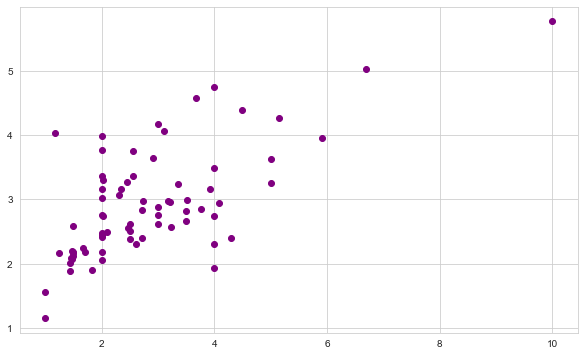

In [240]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,y_predict,color='purple')




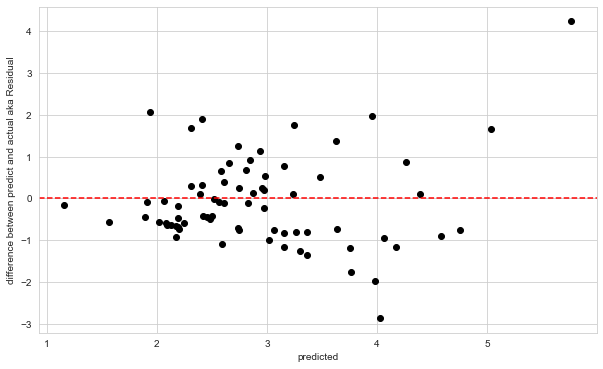

In [241]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


#### not a good look honestly

In [242]:
##########################################################################
################## Gridsearch
##########################################################################

from sklearn.model_selection import GridSearchCV

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [245]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [246]:
%%time

grid_model = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_model.fit(X_train, y_train)

Wall time: 3min 17s


In [247]:
best_model = grid_model.best_estimator_


In [248]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('num', StandardScaler(),
                                                  ['total_bill', 'size'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                                       n_estimators=200, random_state=42))])

In [249]:
y_predict = best_model.predict(X_test)

In [250]:
metrics.r2_score(y_test,y_predict)

0.4684140847583137

In [251]:
metrics.mean_squared_error(y_test,y_predict)

1.105902140804517

In [252]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))           #### went from 1.08 to 1.05 dollars off

1.0516188191566929

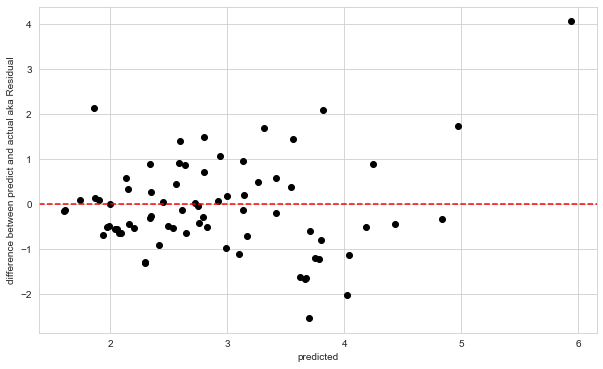

In [253]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


#### better then the last one but still not the best because as the tips max is 10 dollars therefore being off by 1 dollar is not acceptable

In [168]:
#### lets try one last time

from xgboost import XGBRegressor

In [169]:
from sklearn.model_selection import RandomizedSearchCV

In [170]:
from scipy.stats import randint

In [171]:
from scipy.stats import uniform

In [172]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

In [173]:
param_grid = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 10),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

In [174]:
random_model = RandomizedSearchCV(model, param_grid, cv=5, scoring='r2', n_iter=100, random_state=42)

In [175]:
%%time

random_model.fit(X_train, y_train)

Wall time: 11min 12s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'day',
                                                                                'time']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['total_bill',
                                                                                'size'])])),
       

In [176]:
best_model = random_model.best_estimator_

In [177]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'day',
                                                   'time']),
                                                 ('num', StandardScaler(),
                                                  ['total_bill', 'size'])])),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7962072844310213,
                              early_stopping_rounds=None,
                              enable_...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.02393512381599932, max_bin=256,
                        

In [178]:
y_predict = best_model.predict(X_test)

In [179]:
metrics.mean_squared_error(y_test,y_predict)

1.3457900342356948

In [180]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))         #### made it worse

1.1600819084166836

In [181]:
metrics.r2_score(y_test,y_predict)

0.3531045825158782

In [ ]:
#### we will stop here as our model is not improving and the best we got yet was with RMSE of 1.05
#### this dataset is too small to make a good prediction model, also this dataset is not used for making model predictions so that aligns why